# 深度学习 实验2

本节课我们仍然使用上节课的线性模型，了解模型的过拟合与损失函数中的正则项。

### Task 1

读取数据文件 `train_data.csv` 和 `test_data.csv`，文件中列为 `label` 的表示标签，1 表示正例，0 表示负例，其余列为 $x$，取值均为 0 或 1。使用 `train_data.csv` 训练你的模型，并用 `test_data.csv` 进行测试。

模型仍使用上节课的线性模型

$$
\hat y_i=f(x_i)=w\cdot x_i+b
$$

请分别绘制出训练集上的损失与测试集上的损失随迭代次数变化的曲线。

$$
Loss=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2
$$

### Task 2

不出意外，你会发现在 Task 1 中测试集上的损失明显大于训练集上的损失，这说明我们的模型出现了过拟合，下面我们在模型的损失函数中添加“正则项”

$$
Loss=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2+\alpha ||w||^2
$$

仍然可以使用随机梯度下降法，请自行推导迭代中需要的公式，并用上述损失函数重新训练与测试模型。

### Task 3

尝试使用不同的参数 $\alpha$ 进行测试，试分析损失函数中的正则项对模型效果的影响。

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib 
import matplotlib.pyplot as plt
# matplotlib.rcParams['font.sans-serif']=['SimHei']

In [2]:
df=pd.read_csv('train_data.csv',
#                header=None,
              )
df.head(5)    
df2=pd.read_csv('test_data.csv',
#                header=None,
               )
df2.head(5)    
test_data_label = df2.loc[:,'label']
test_data = df2.iloc[:,:100]
test_data = np.matrix(test_data.values)
# load data

#### $\color{blue}{Task1 \; Solution:}$

**使用上次实验得到的线性模型，绘制出训练集上的损失与测试集上的损失随迭代次数变化的曲线，尝试不同的学习率，观察并分析**

In [3]:
train_data_label = df.loc[:,'label'] #选中训练数据标签
train_data = df.iloc[:,:100] #选中训练数据

In [4]:
train_data =np.matrix(train_data.values) 
weight = np.random.uniform(-0.1,0.1,100) #随机初始化权重
weight = weight.reshape(100,1) #转化权重向量维度
bias = np.random.randn(1) #偏置项
print('shape of training data:',train_data.shape)
# print(train_data)
# print(train_data_label.shape)
print('number of labels:',len(train_data_label))

shape of training data: (595, 100)
number of labels: 595


In [12]:
def predict_function(weight,sample,bias):
    # 实现线性回归模型，和之前一样
    pred = np.dot(sample,weight)+bias
    return pred

def compute_grad(weight,sample,truth,bias): #这是原目标函数求导后的结果，可以沿用
    prediction = predict_function(weight,sample,bias)
    loss = prediction-truth
    return loss

def compute_square_loss(weight,sample,truth,bias): 
    #计算单一样本平方损失
    prediction = predict_function(weight,sample,bias)
    #loss = 0.5*(prediction-truth)**2
    loss = (prediction-truth)**2 
    return loss

def cal_gradient(weight,train_data,label,bias): 
    #bais和weight都要用到(y^hat-y)，对于bias可以直接使用这个梯度，对于权重向量
    # 还需要乘上对应的样本元素
    grad = compute_grad_origin(weight,train_data,label,bias)
    return grad

def update_weight(weight,gradient,Xi):
    # 更新权重，这里在传入参数时应一个个更新，最后让梯度乘以相应的特征元素即可
    weight = weight - learning_rate * gradient *Xi
    return weight

def update_bias(bias,gradient):
    # 更新偏置项
    bias = bias - learning_rate * gradient
    return bias

In [13]:
train_num = len(train_data)
print('training set number:',train_num)

test_num = len(test_data)
print('test set number:',test_num)


training set number: 595
test set number: 254


In [15]:
learning_rate = 0.02 #learning rate可以按需求调整

y1=[]
y2=[]

SGD_training_turns = 1000
# for train in range(0,training_turns):# GD
for train in range(0,SGD_training_turns): #随机梯度下降SGD
    sample = random.randrange(0,train_num) #随机抽取一个训练样本
    grad = cal_gradient_origin(weight,train_data[sample],train_data_label[sample],bias)
    bias = update_bias(bias,grad)
    loss = compute_square_loss(weight,train_data[sample],train_data_label[sample],bias)
    for w in range(len(weight)):
        gradient = np.dot(train_data[sample,w],grad)
        weight[w]=update_weight(weight[w],grad,train_data[sample,w])
    #print('round:',train+1,'square loss:',loss)
    train_total_loss = 0
    test_total_loss = 0
    for i in range(0,train_num):
        train_total_loss += compute_square_loss(weight,train_data[i],train_data_label[i],bias)/train_num
    # 每次SGD更新都重新计算训练集的total loss
    for j in range(0,test_num):
        test_total_loss += compute_square_loss(weight,test_data[j],test_data_label[j],bias)/test_num    
    # 每次SGD更新都重新计算测试集的total loss
    train_temp = train_total_loss.tolist()
    test_temp = test_total_loss.tolist()
    y1.append(train_temp[0])
    y2.append(test_temp[0])
    # 用于画图

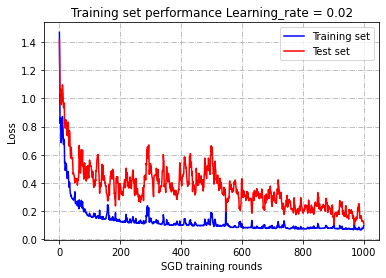

In [9]:
def loss_plot(y1,y2):
    line1, = plt.plot(y1,'blue',label = 'Training set')
    line2, = plt.plot(y2,'red', label = 'Test set') # 记得加逗号，否则legend会找不到维度
    plt.title('Training set performance Learning_rate = 0.02')
    plt.legend(handles=[line1, line2], labels=['Training set','Test set'], loc='best')
    plt.grid(linestyle='-.')
    plt.xlabel('SGD training rounds')
    plt.ylabel('Loss')
    plt.show()
    
loss_plot(y1,y2)

# 分别测试了 learning_rate = 0.001/0.01/0.05

绘制出训练集上的损失与测试集上的损失随迭代次数变化的曲线，可以看到二者的差异：训练集性能高于测试集不少。

#### $\color{blue}{Task2 \; Solution:}$

**为使用上次实验得到的线性模型添加正则化项，绘制出训练集上的损失与测试集上的损失随迭代次数变化的曲线，观察并分析正则化项对模型性能的影响**

对线性模型添加正则化项 

$$L_{2}: \Omega(\theta)=\frac{1}{2}\|w\|_{2}^{2}$$ 

Remark：这里的$\frac{1}{2}$是为了方便求导，我们取 $\alpha$ 为正则化强度

优化目标如下

$$\tilde{J}(w,b;X,y)=J(w,b;X,y)+\frac{\alpha}{2} w^{T} w$$

对目标函数求导得到梯度表达式

$$\nabla_{w} \tilde{J}(w,b; X, y)=\nabla_{w} J(w,b; X, y)+\alpha w$$

update rule:

$$w \leftarrow w-\epsilon\left(\nabla_{w} J(w,b; X, y)+\alpha w\right)$$


仔细观察可以发现，其实需要我们额外实现的就是每次计算梯度时考虑到 $w^{T}w$ 求导后产生的 $w$ 向量，而更新规则函数的实现是不变的

In [36]:
weight = np.random.uniform(-0.1,0.1,100) #随机初始化权重
weight = weight.reshape(100,1) #转化权重向量维度
bias = np.random.randn(1) #偏置项

In [37]:
def predict_function(weight,sample,bias):
    # 实现线性回归模型
    pred = np.dot(sample,weight)+bias
    return pred

def compute_grad_origin(weight,sample,truth,bias): 
    # 没添加正则化项时候单一样本梯度
    prediction = predict_function(weight,sample,bias)
    loss = prediction-truth
    return loss

def compute_square_loss_reg(weight,sample,truth,bias): 
    # 计算单一样本平方损失
    prediction = predict_function(weight,sample,bias)
    #loss = 0.5*(prediction-truth)**2
    loss = (prediction-truth)**2 + alpha*np.dot(weight.T,weight) #这里直接使用np.dot实现正则化项
    return loss

def cal_gradient_origin(weight,train_data,label,bias): 
    #bais和weight都要用到(y^hat-y)，对于bias可以直接使用这个梯度，对于权重向量
    # 还需要乘上对应的样本元素
    grad = compute_grad_origin(weight,train_data,label,bias)
    return grad

def update_weight(weight,gradient,Xi):
    # 更新权重，这里在传入参数时应一个个更新，最后让梯度乘以相应的特征元素即可
    weight = weight - learning_rate * gradient *Xi
    return weight

def update_bias(bias,gradient):
    # 更新偏置项，根据上述数学关系，直接使用梯度即可
    bias = bias - learning_rate * gradient
    return bias

In [38]:
learning_rate = 0.02 # learning rate可以按需求调整
alpha = 0.025 # 正则化强度可以按需要调整
y1=[]
y2=[]

SGD_training_turns = 1000
# for train in range(0,training_turns):# GD
for train in range(0,SGD_training_turns): #随机梯度下降SGD
    sample = random.randrange(0,train_num) #随机抽取一个训练样本
    grad = cal_gradient_origin(weight,train_data[sample],train_data_label[sample],bias)
    bias = update_bias(bias,grad)
    loss = compute_square_loss_reg(weight,train_data[sample],train_data_label[sample],bias)
    for w in range(len(weight)):
        gradient = np.dot(train_data[sample,w],grad)  + alpha * weight[w] 
        #这里需要把正则化项纳入考虑，w^Tw求导后的w向量作为梯度一部分，在这里逐元素更新即可，别的函数不需要修改
        weight[w]=update_weight(weight[w],grad,train_data[sample,w])
    train_total_loss = 0
    test_total_loss = 0
    for i in range(0,train_num):
        train_total_loss += compute_square_loss(weight,train_data[i],train_data_label[i],bias)/train_num
    # 每次SGD更新都重新计算训练集的total loss
    for j in range(0,test_num):
        test_total_loss += compute_square_loss(weight,test_data[j],test_data_label[j],bias)/test_num    
    # 每次SGD更新都重新计算测试集的total loss
    train_temp = train_total_loss.tolist()
    test_temp = test_total_loss.tolist()
    y1.append(train_temp[0])
    y2.append(test_temp[0])
    # 用于画图

In [40]:
print('training set loss:',train_total_loss )

training set loss: [[0.08553554]]


In [41]:
print('test set loss:',test_total_loss )

test set loss: [[0.14823848]]


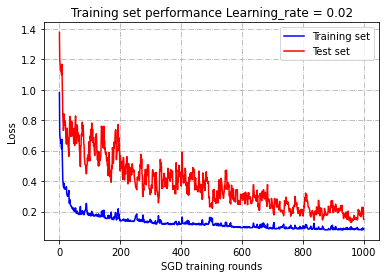

In [39]:
def loss_plot(y1,y2):
    line1, = plt.plot(y1,'blue',label = 'Training set')
    line2, = plt.plot(y2,'red', label = 'Test set') # 记得加逗号，否则legend会找不到维度
    plt.title('Training set performance Learning_rate = 0.02')
    plt.legend(handles=[line1, line2], labels=['Training set','Test set'], loc='best')
    plt.grid(linestyle='-.')
    plt.xlabel('SGD training rounds')
    plt.ylabel('Loss')
    plt.show()
    
loss_plot(y1,y2)

添加正则化项后，和之前在0.02学习率时的测试集曲线对比，可以发现有几个明显的“波峰”消失了，但是测试集和训练集的差异依然存在。

#### $\color{blue}{ Task3 \; Solution:}$

接下来开始调一下参数，看看不同的正则化强度对模型性能的影响，这里固定学习率为0.02

In [51]:
def loss_plot_reg(y1,y2):
    line1, = plt.plot(y1,'blue',label = 'Training set')
    line2, = plt.plot(y2,'red', label = 'Test set') # 记得加逗号，否则legend会找不到维度
    plt.title('Performance under regularization')
    plt.legend(handles=[line1, line2], labels=['Training set','Test set'], loc='best')
    plt.grid(linestyle='-.')
    plt.xlabel('SGD training rounds')
    plt.ylabel('Loss')
    plt.show()

alpha= 0.005
train set loss: [[0.06599352]]
test set loss: [[0.13352351]]


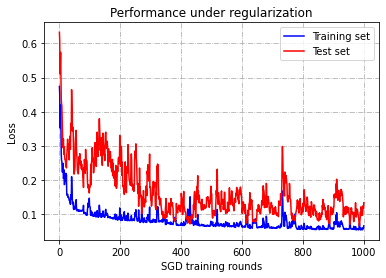

alpha= 0.01
train set loss: [[0.0594888]]
test set loss: [[0.04086148]]


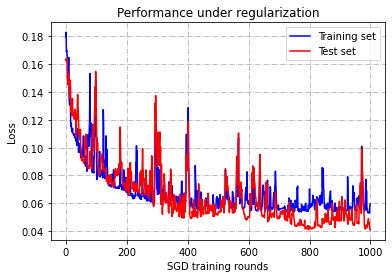

alpha= 0.02
train set loss: [[0.0641119]]
test set loss: [[0.0545776]]


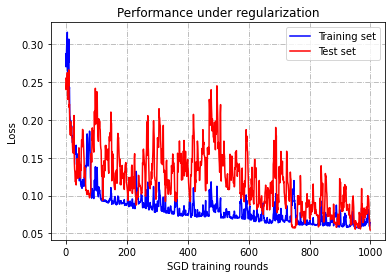

alpha= 0.025
train set loss: [[0.06162933]]
test set loss: [[0.07257731]]


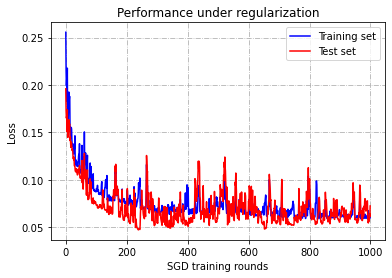

alpha= 0.03
train set loss: [[0.10767793]]
test set loss: [[0.30294804]]


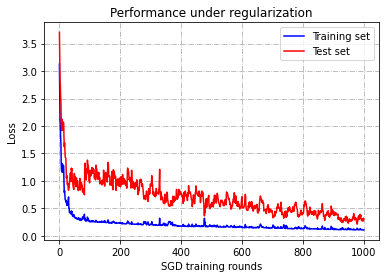

In [54]:
learning_rate = 0.02 # learning rate 固定

ALPHA = [0.005, 0.01, 0.02, 0.025, 0.03]
#定义一个数组存储待选参数，有点点像grid search～，不过为了画图还得把结果都保存下来，否则直接用更优学习率/正则化强度替换不如它的参数就可以了
SGD_training_turns = 1000

for alpha in ALPHA:
    print('alpha=',alpha)
    y_train=[]
    y_test=[]
    weight = np.random.uniform(-0.1,0.1,100) #随机初始化权重
    weight = weight.reshape(100,1) #转化权重向量维度
    bias = np.random.randn(1) #偏置项
    for train in range(0,SGD_training_turns): #随机梯度下降SGD
        sample = random.randrange(0,train_num) #随机抽取一个训练样本
        grad = cal_gradient_origin(weight,train_data[sample],train_data_label[sample],bias)
        bias = update_bias(bias,grad)
        loss = compute_square_loss_reg(weight,train_data[sample],train_data_label[sample],bias)
        for w in range(len(weight)):
            gradient = np.dot(train_data[sample,w],grad)  + alpha * weight[w] 
            weight[w]=update_weight(weight[w],grad,train_data[sample,w])
        train_total_loss = 0
        test_total_loss = 0
        for i in range(0,train_num):
            train_total_loss += compute_square_loss(weight,train_data[i],train_data_label[i],bias)/train_num
        for j in range(0,test_num):
            test_total_loss += compute_square_loss(weight,test_data[j],test_data_label[j],bias)/test_num 
        train_temp = train_total_loss.tolist()
        test_temp = test_total_loss.tolist()
        y_train.append(train_temp[0])
        y_test.append(test_temp[0])
    print('train set loss:',train_total_loss)
    print('test set loss:',test_total_loss)
    loss_plot_reg(y_train,y_test)

观察上述几张图片可知，正则化强度对模型性能的影响还是比较显著的，虽然这个数据集本身规律性比较好，容易拟合，但是在损失值的绝对量上还是经过正则化的模型表现好于没有正则化的模型。在我设定的参数搜索范围内，表现比较好的是强度为0.025和强度为0.01的两组参数，前者在训练集和测试集的损失差异上已经非常小了，两条折线也接近重叠。后者的波动幅度略大，但损失的绝对值更小。（看起来觉得很大是因为matplotlib这里固定了y轴的长度，如果二者在同一个图里波动幅度会降低，但同时看训练集和测试集就会不清楚）。最后的一张图虽然看起来波动非常平均，但是损失值的绝对值上比前二者都大，反而会有欠拟合的可能。

$\color{blue}{\large 思考:}$ 正则化项的作用

正则化强度越大，对目标函数的约束越严格，太大了就容易产生欠拟合。正则化参数太小的话又起不到约束作用，容易产生过拟合。正则化强度和学习率是经常需要搜索的参数，直接将可能的参数分布放入两个数组进行grid search会很方便。

除此之外，不同的正则化方法可以改变参数的分布的偏好：

1. L2正则化可以直观理解为它对于绝对值偏大的权重元素进行惩罚，倾向于更加分散的权重向量。由于输入和权重之间的乘法操作，这样就能够使模型不是严重依赖输入特征中某些小部分特征，避免权重矩阵（向量）中出现不合理的元素值。L2惩罚倾向于更小更分散的权重向量，这就会让模型将所有维度上的特征都用起来，可以提高模型的泛化能力，降低过拟合的风险。
2. L1正则化会让权重向量在最优化的过程中变得稀疏。也就是说使用L1正则化后模型主要依靠的输入数据的一小部分重要特征进行判别，相较L1正则化，L2正则化中的权重向量大多是分散且分布均匀的绝对值偏小的权重元素。

**End of Homework2**

**助教老师您幸苦了**